In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

import warnings

warnings.filterwarnings('ignore')

In [2]:
#Загрузка данных и проверка на 10-ти первых строках, что все данные корректно отображаются
data = pd.read_csv('LTV.csv')
data.head(10)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
5,OC83172,Oregon,8256.297800,Yes,Basic,Bachelor,1/25/11,Employed,F,62902,...,94,0,2,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize
6,XZ87318,Oregon,5380.898636,Yes,Basic,College,2/24/11,Employed,F,55350,...,13,0,9,Corporate Auto,Corporate L3,Offer1,Agent,321.600000,Four-Door Car,Medsize
7,CF85061,Arizona,7216.100311,No,Premium,Master,1/18/11,Unemployed,M,0,...,68,0,4,Corporate Auto,Corporate L3,Offer1,Agent,363.029680,Four-Door Car,Medsize
8,DY87989,Oregon,24127.504020,Yes,Basic,Bachelor,1/26/11,Medical Leave,M,14072,...,3,0,2,Corporate Auto,Corporate L3,Offer1,Agent,511.200000,Four-Door Car,Medsize
9,BQ94931,Oregon,7388.178085,No,Extended,College,2/17/11,Employed,F,28812,...,7,0,8,Special Auto,Special L2,Offer2,Branch,425.527834,Four-Door Car,Medsize


In [7]:
# Проверяем, что нет строк без значений
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [3]:
# Определяем целевую переменную и даты фрейм (удаляю оттуда столбец Customer, так там уникальные данные, которые не нужны для прогноза)
X = data.drop(['Customer Lifetime Value', 'Customer'], axis = 1)
y = data['Customer Lifetime Value']

,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,Washington,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,Married,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,California,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,Divorced,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,Single,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,California,No,Extended,College,2/3/11,Employed,M,21941,Suburban,Married,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


## Выделим численные признаки от остальных

In [4]:
# Выделяю численные признаки от остальных
num_cols = []
str_cols = []

cols_and_type = X.dtypes.to_dict()

for col in cols_and_type:
    if cols_and_type[col] in ('int64', 'float64'):
        num_cols.append(col)
    else: 
        str_cols.append(col)
        
print(num_cols)

['State', 'Response', 'Coverage', 'Education', 'Effective To Date', 'EmploymentStatus', 'Gender', 'Location Code', 'Marital Status', 'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size']


In [32]:
data[num_cols].describe()

,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [21]:
data[str_cols].describe()

,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
count,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134
unique,5,2,3,5,59,5,2,3,3,3,9,4,4,6,3
top,California,No,Basic,Bachelor,1/10/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Four-Door Car,Medsize
freq,3150,7826,5568,2748,195,5698,4658,5779,5298,6788,3426,3752,3477,4621,6424


## Визуализация данных

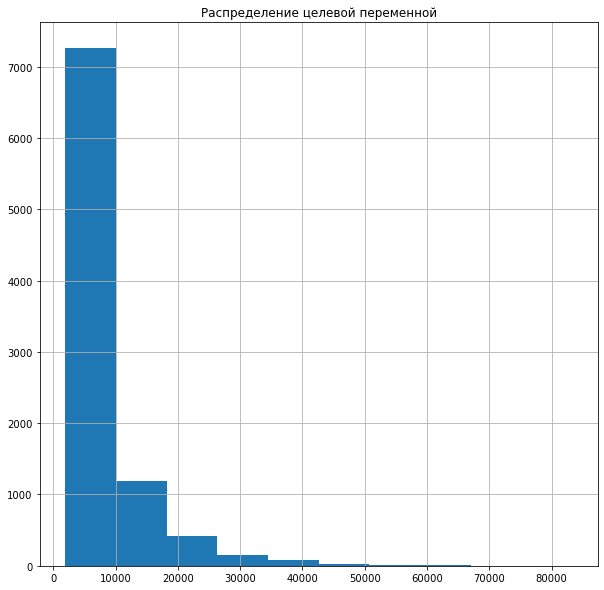

In [21]:
# Распределение целевой переменной (LTV)
plt.figure(figsize = (10, 10))
plt.title('Распределение целевой переменной')
data['Customer Lifetime Value'].hist()
plt.show()

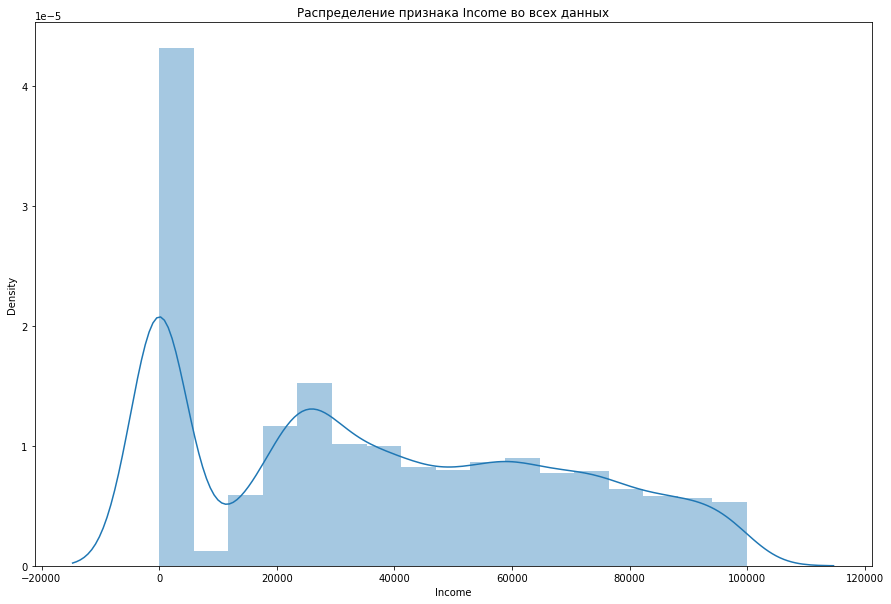

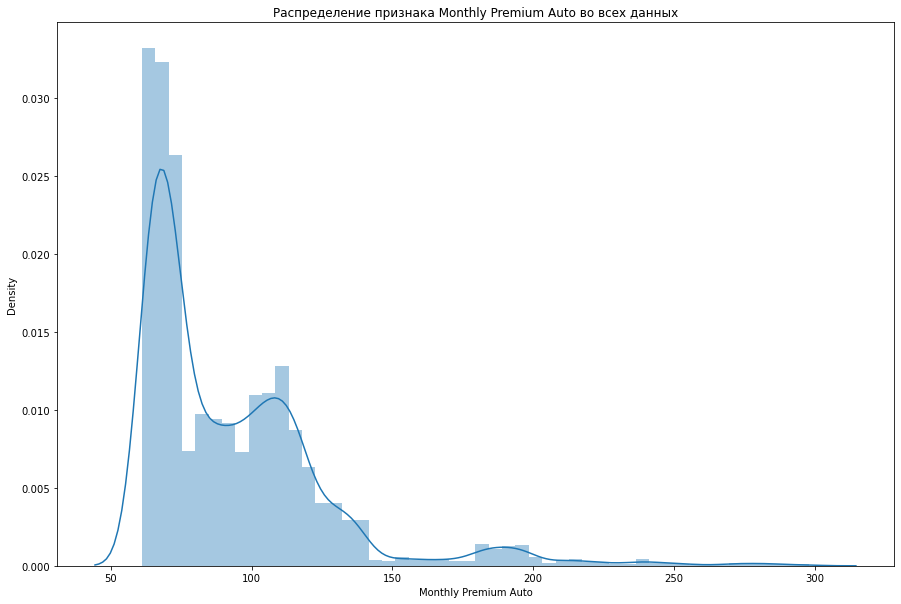

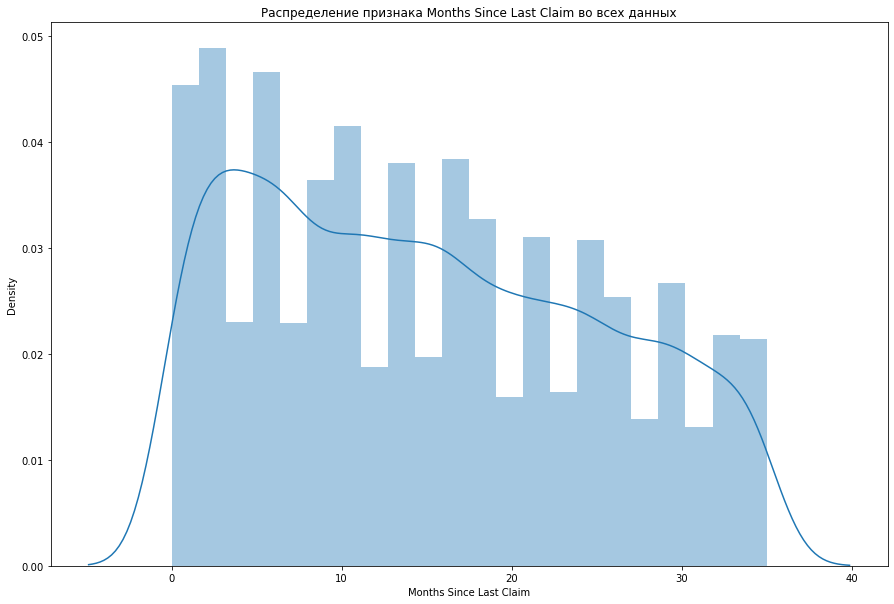

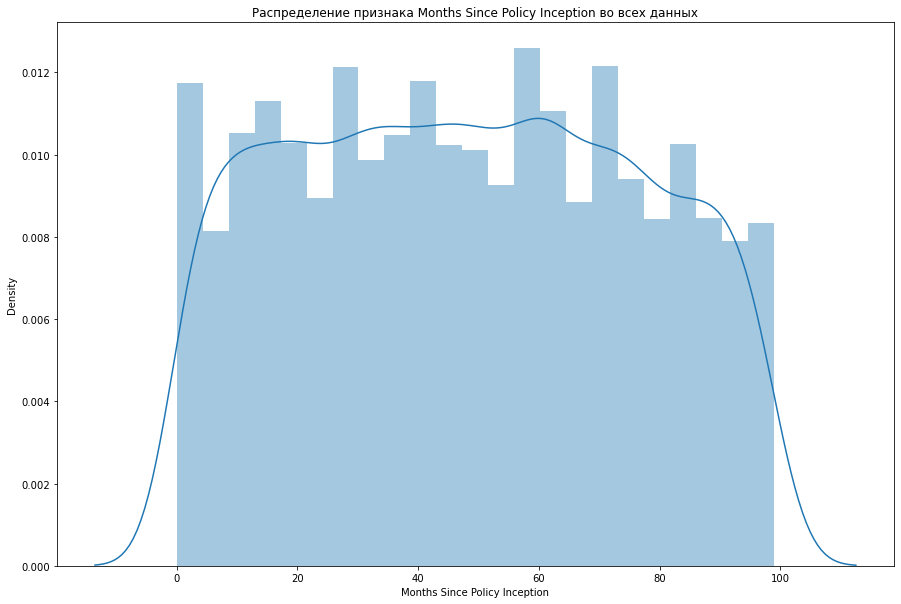

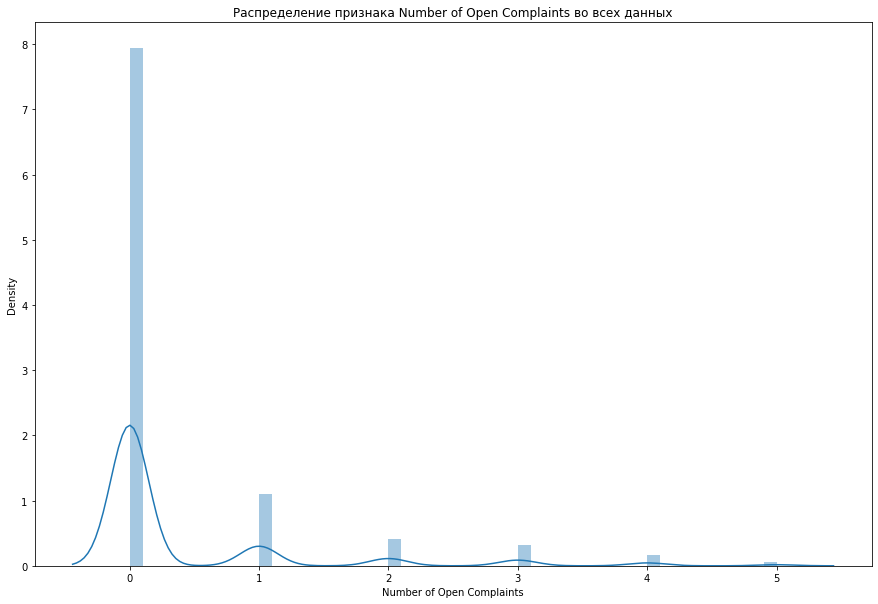

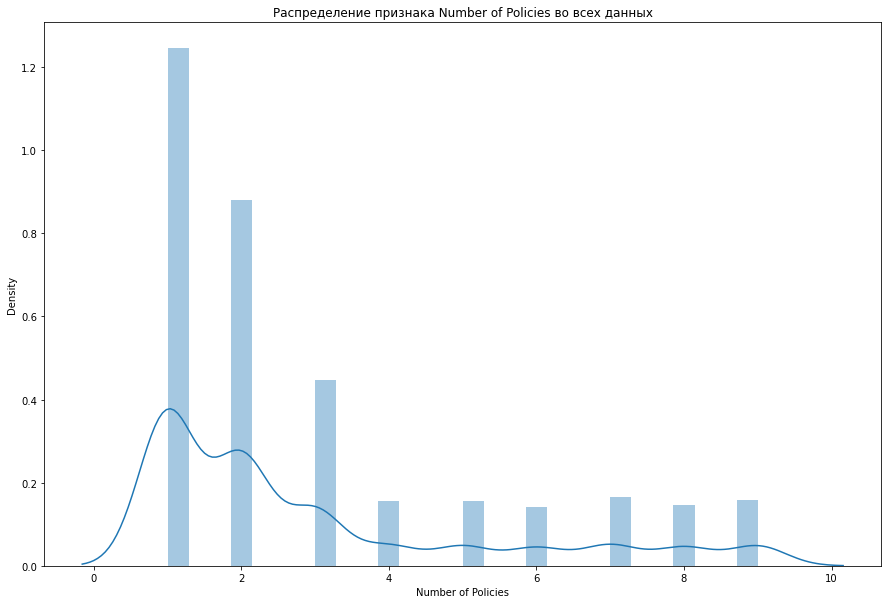

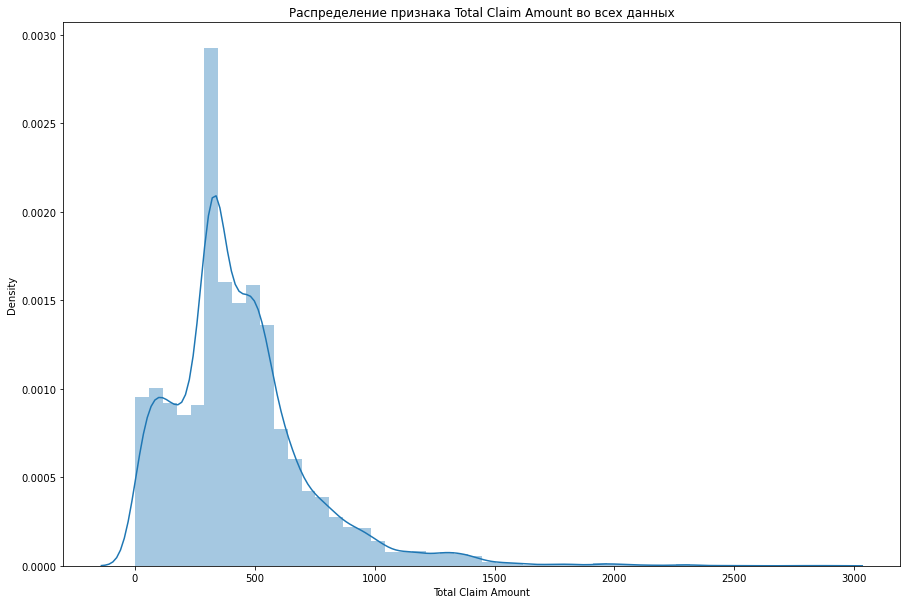

In [48]:
# Распределение численых признаков
for col in num_cols:
    plt.figure(figsize = (15, 10))
    plt.title(f'Распределение признака {col} во всех данных')
    sns.distplot(data[col])

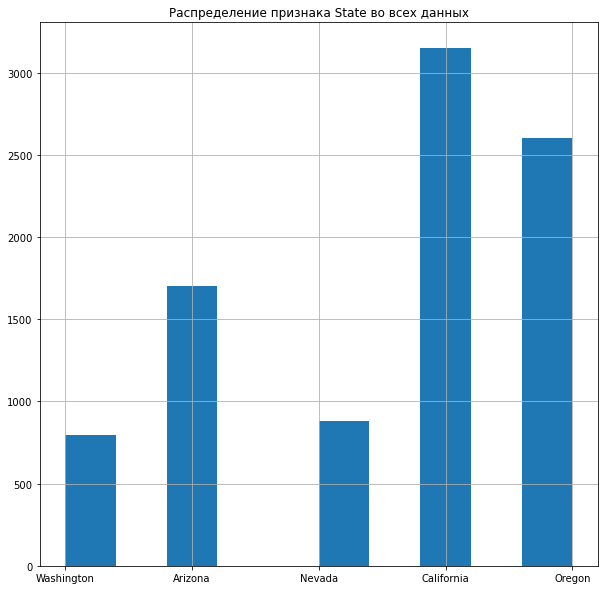

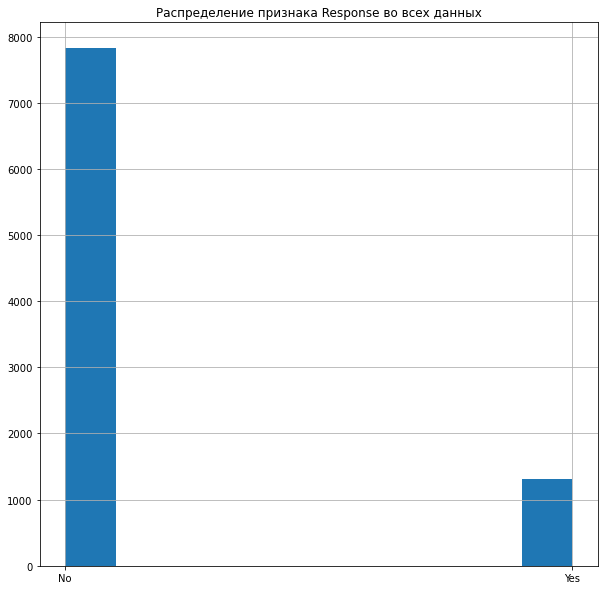

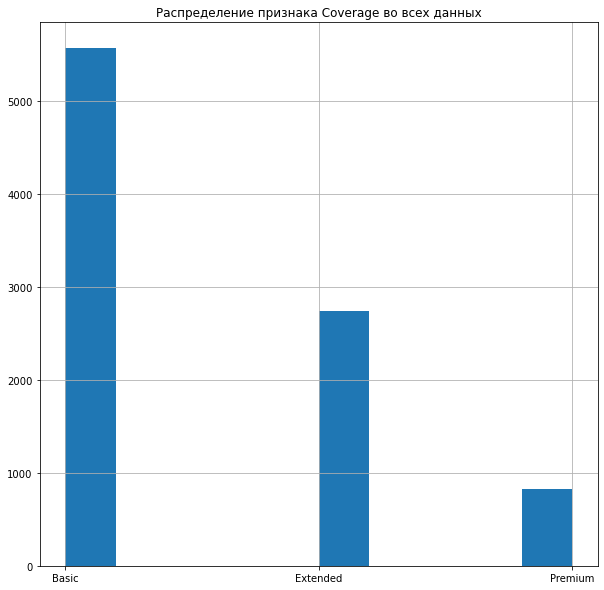

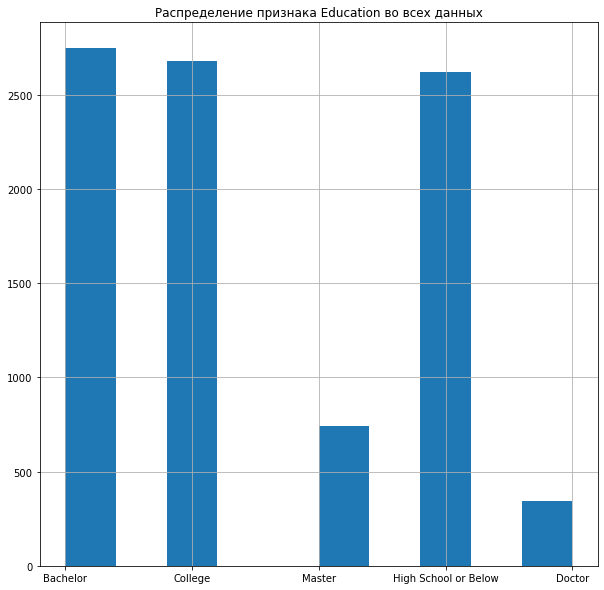

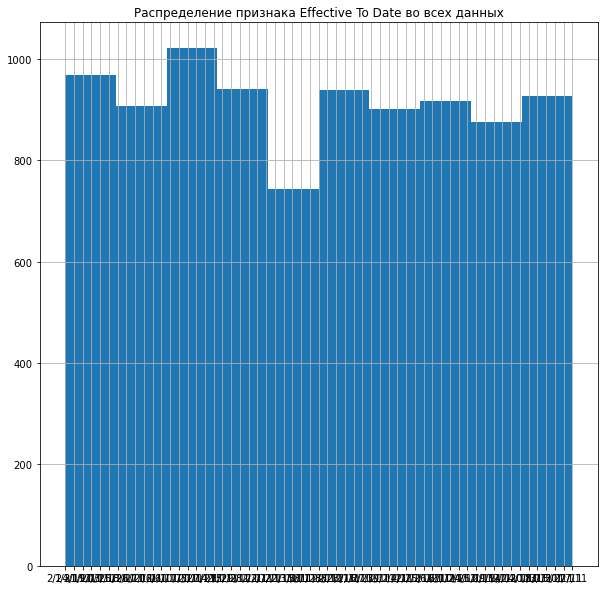

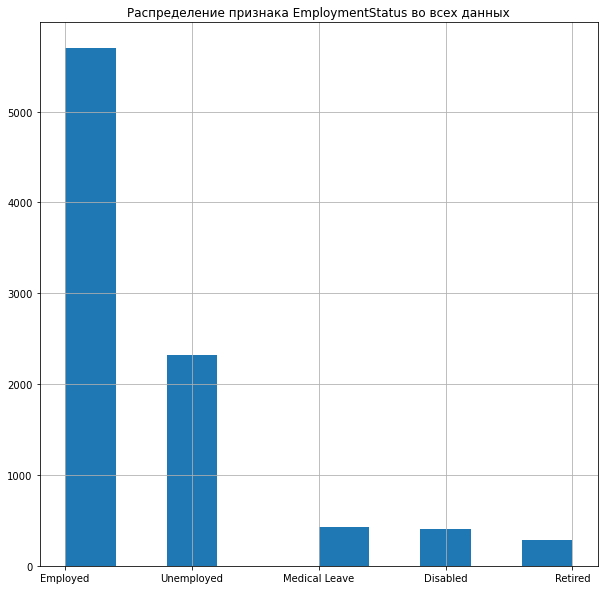

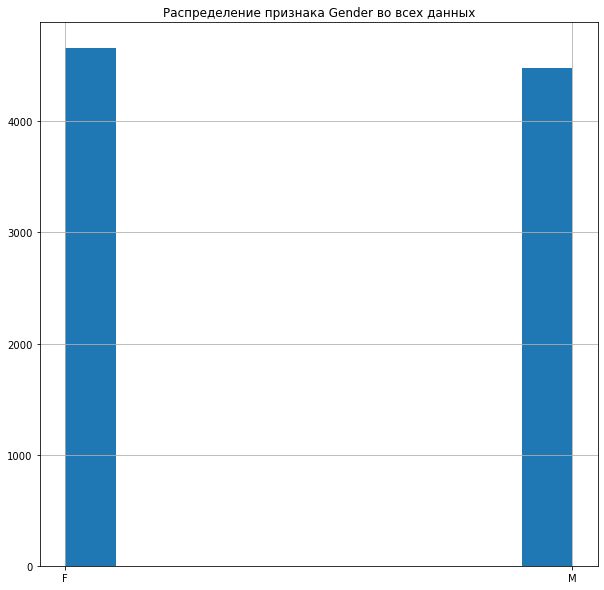

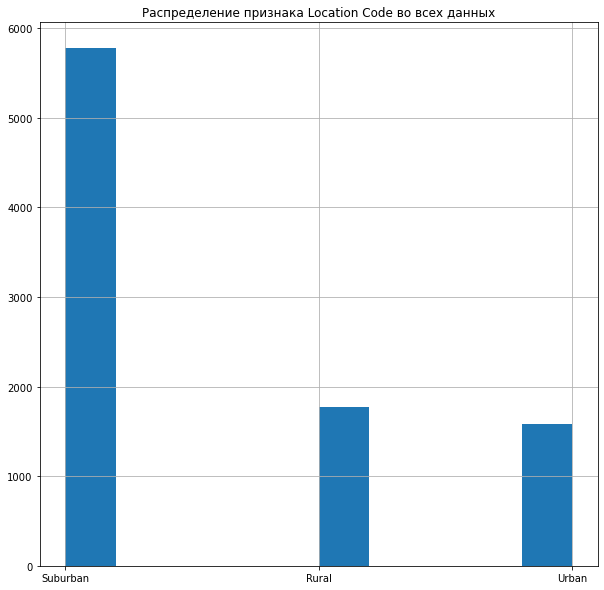

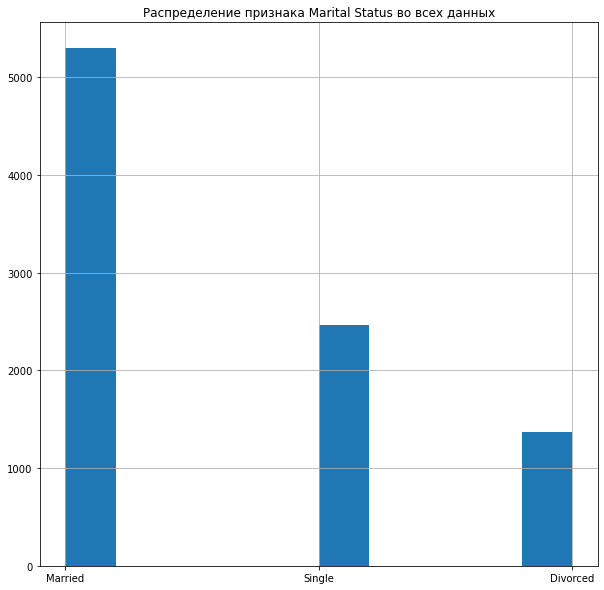

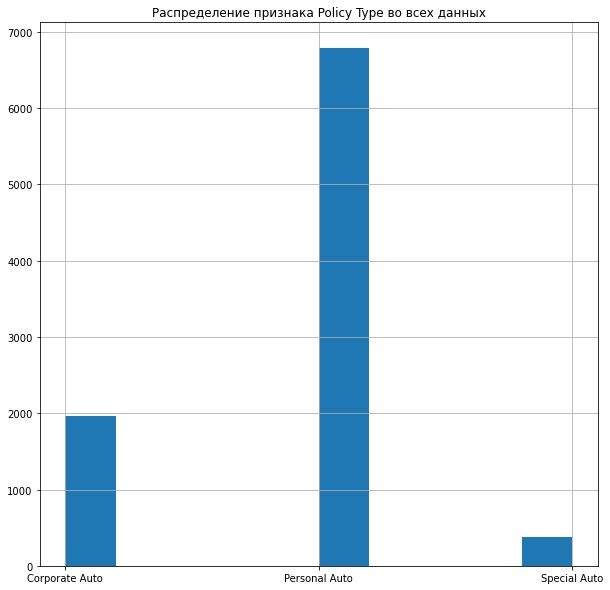

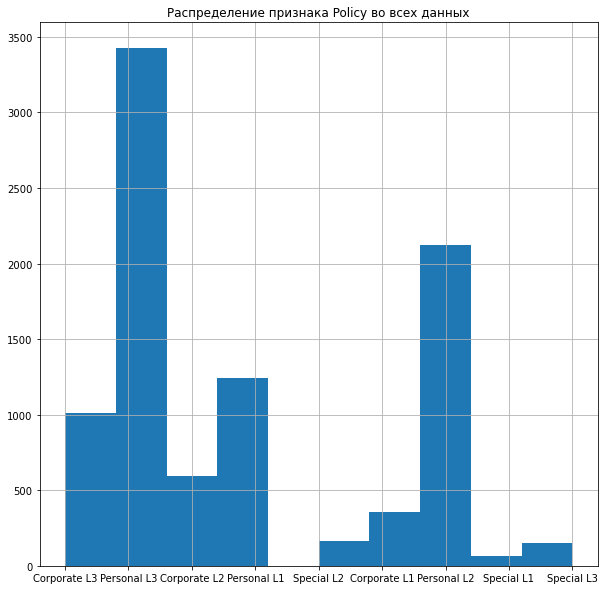

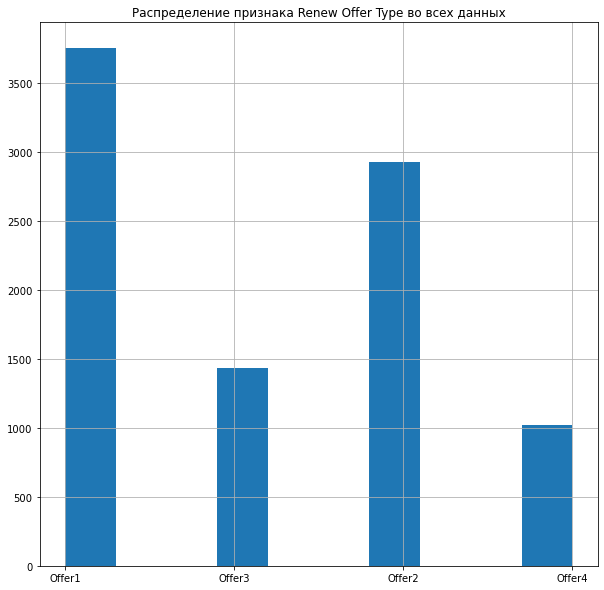

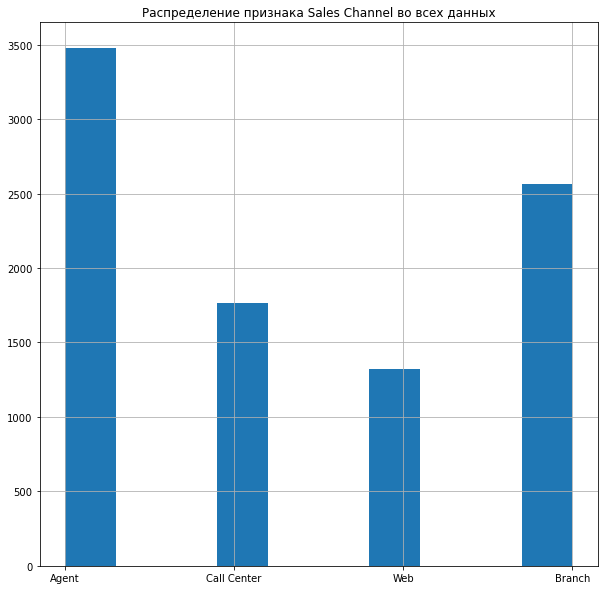

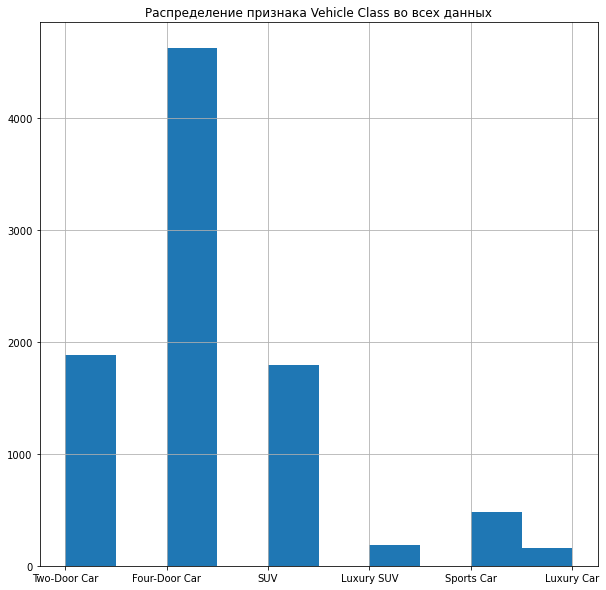

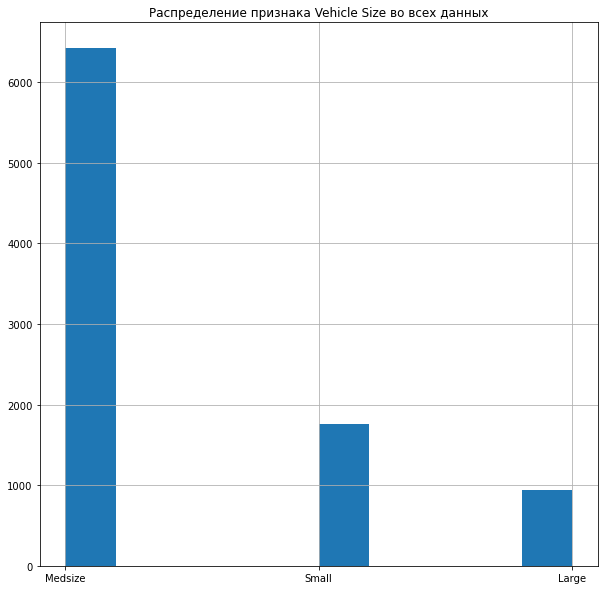

In [11]:
# Распределение строковых признаков
for col in str_cols:
    plt.figure(figsize = (10, 10))
    plt.title(f'Распределение признака {col} во всех данных')
    data[col].hist()
    
# Мини-выводы: больше всего клиентов из Калифорнии и Орегона; преимущественное число не взаимодействовало с рекламой 
# и является абонентом базового тарифа и проживает в пригороде.

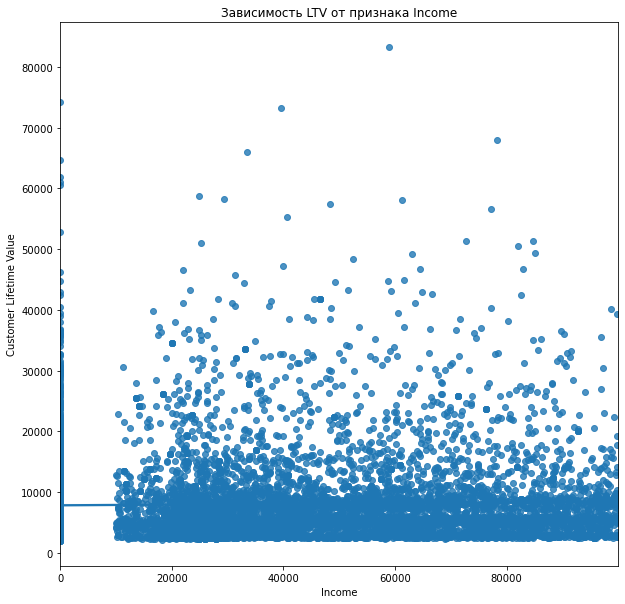

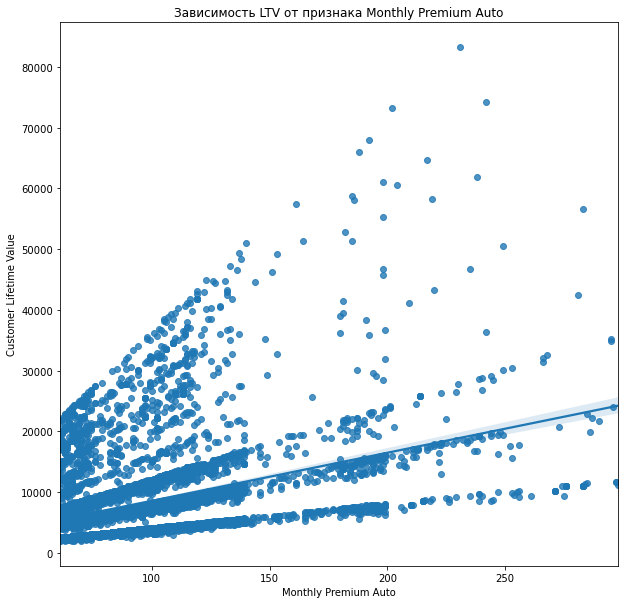

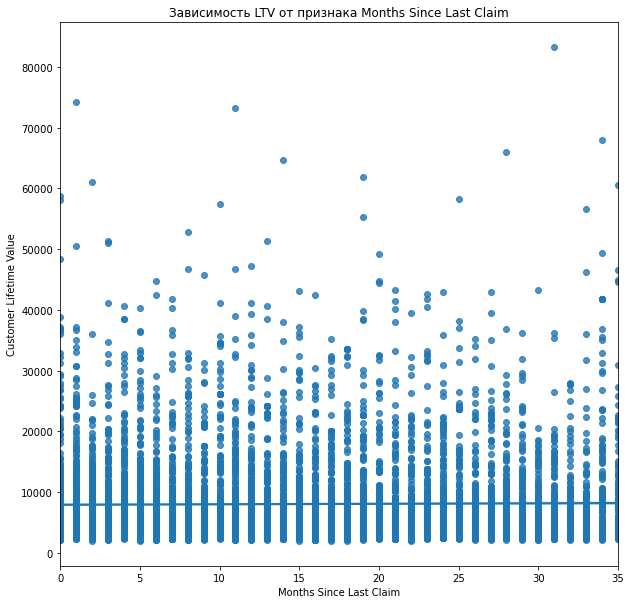

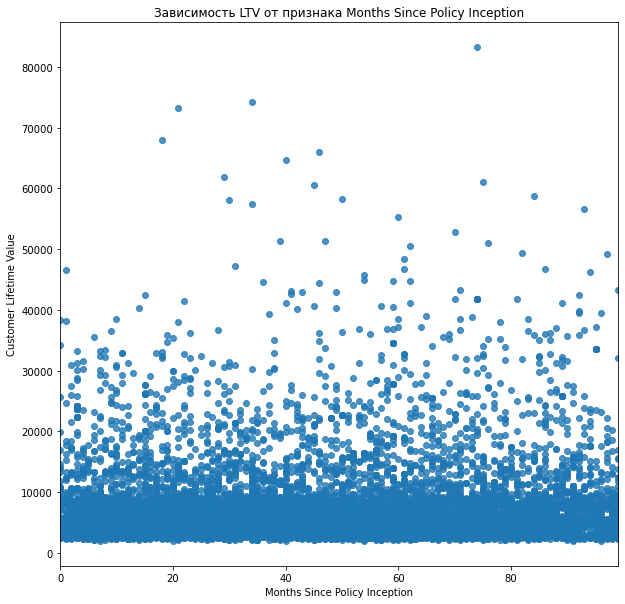

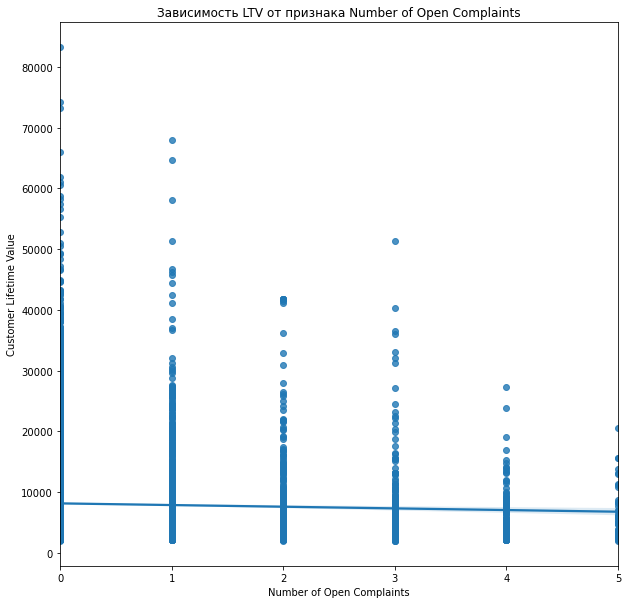

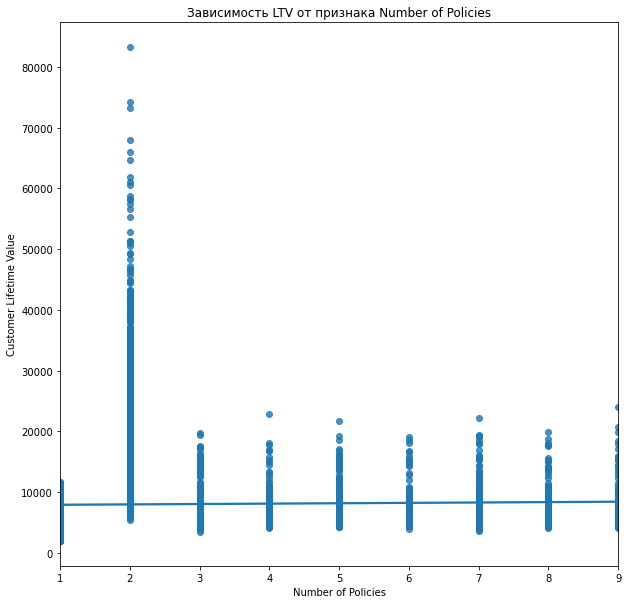

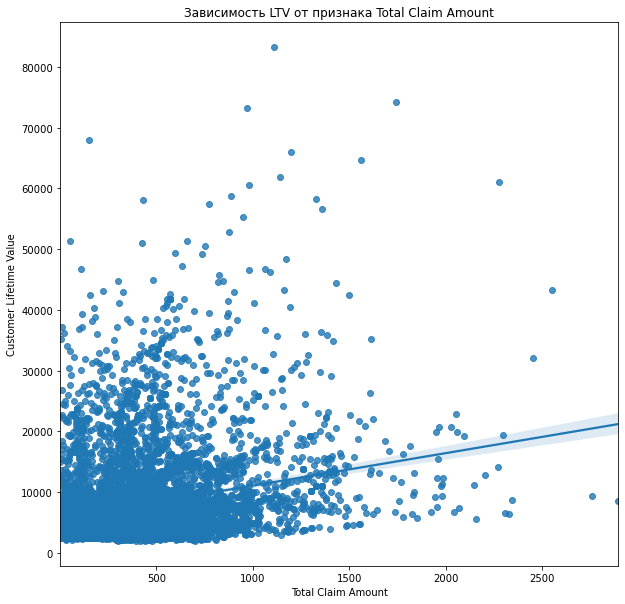

In [86]:
# Зависимость LTV от численных признаков
for col in num_cols:
    plt.figure(figsize = (10, 10))
    plt.title(f'Зависимость LTV от признака {col}')
    sns.regplot(x=data[col], y = data["Customer Lifetime Value"])

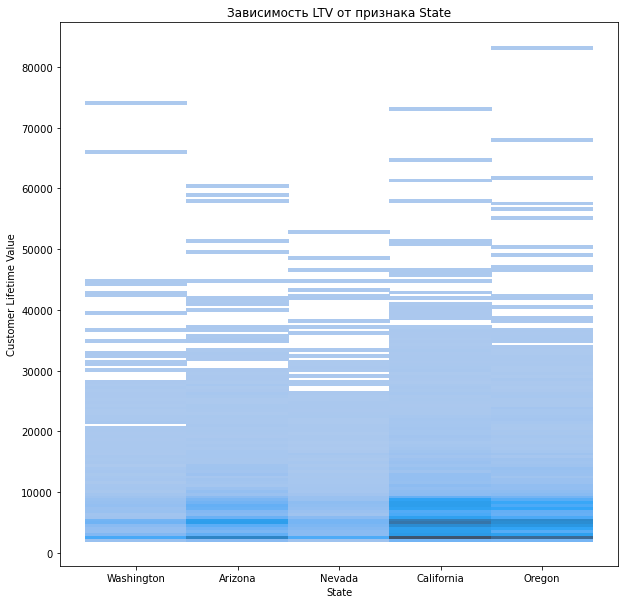

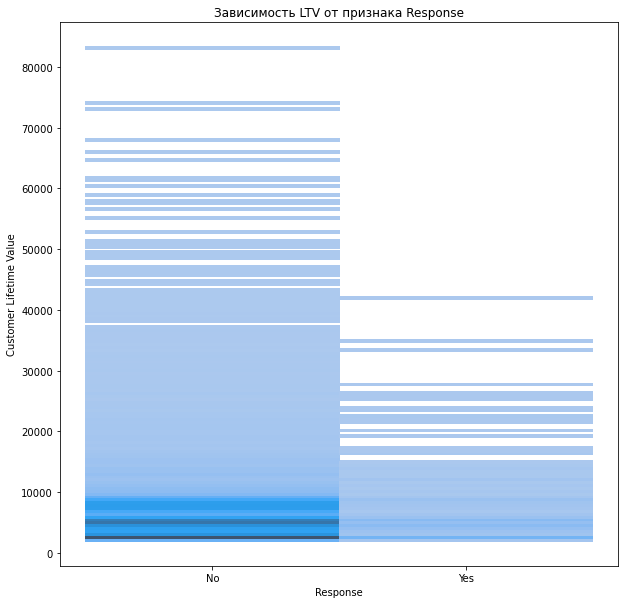

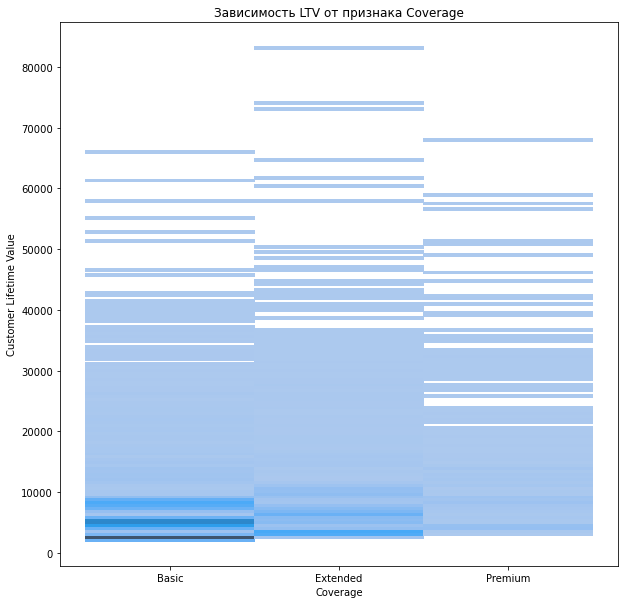

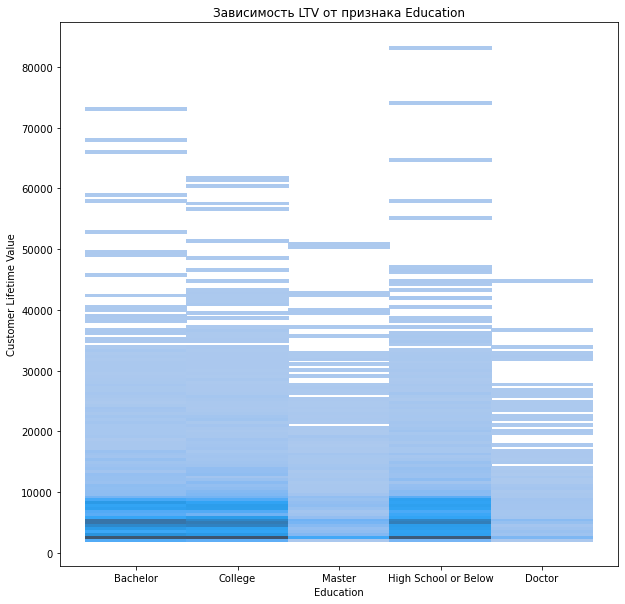

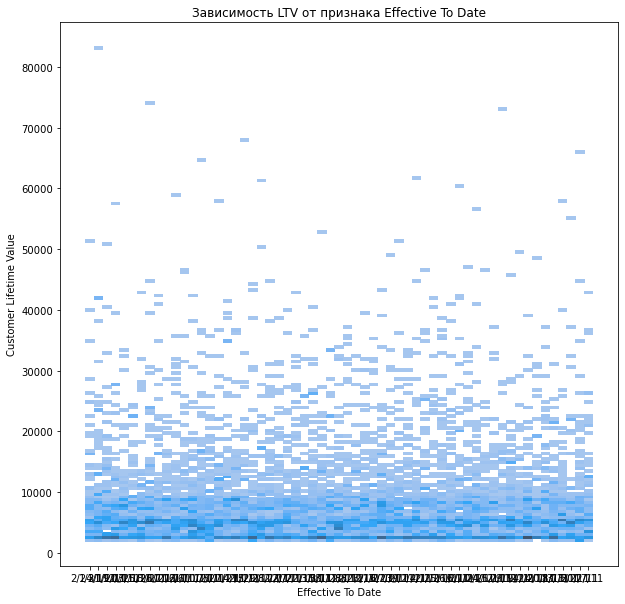

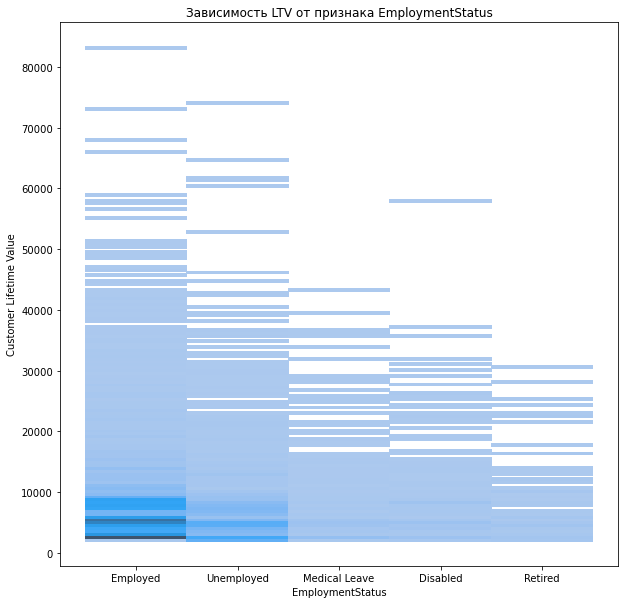

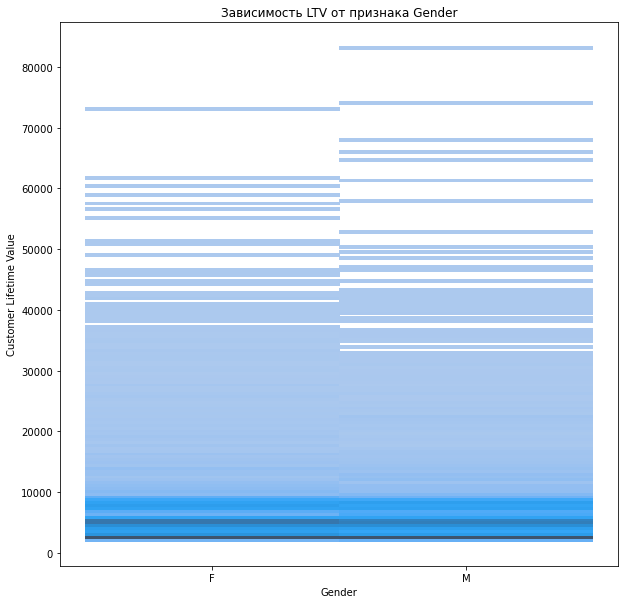

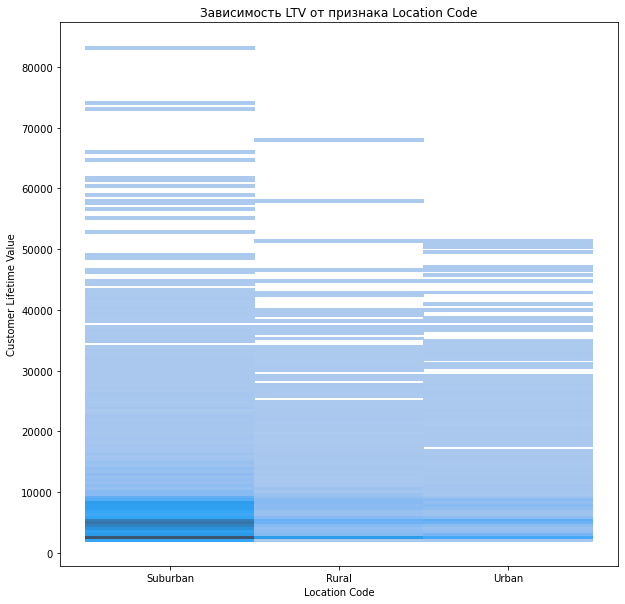

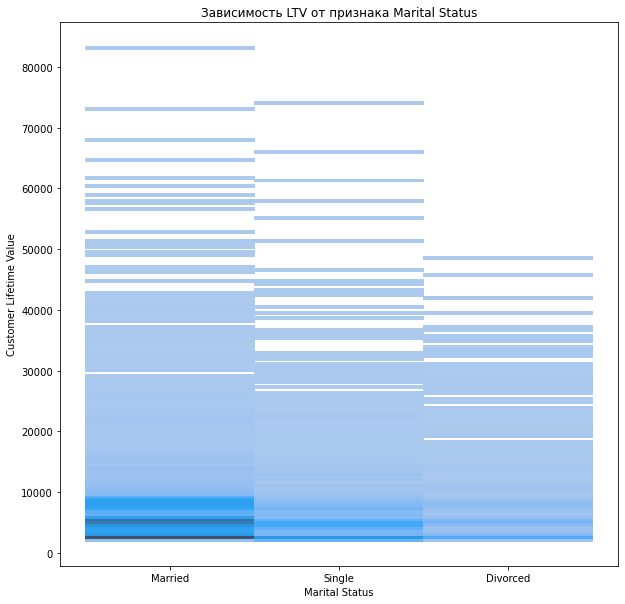

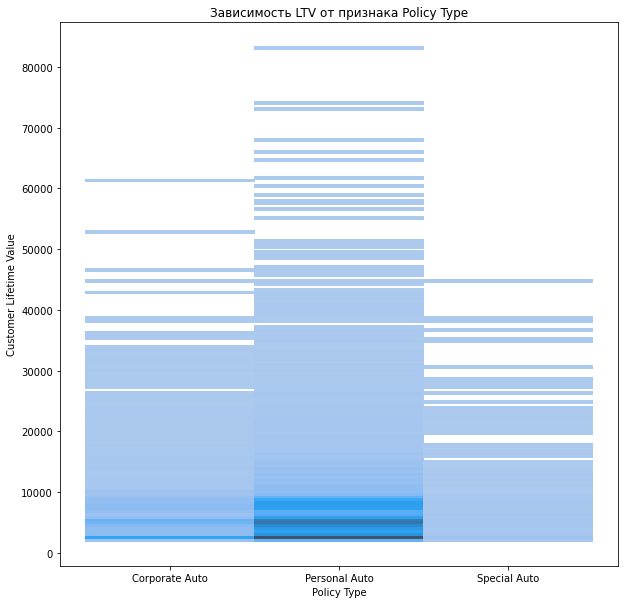

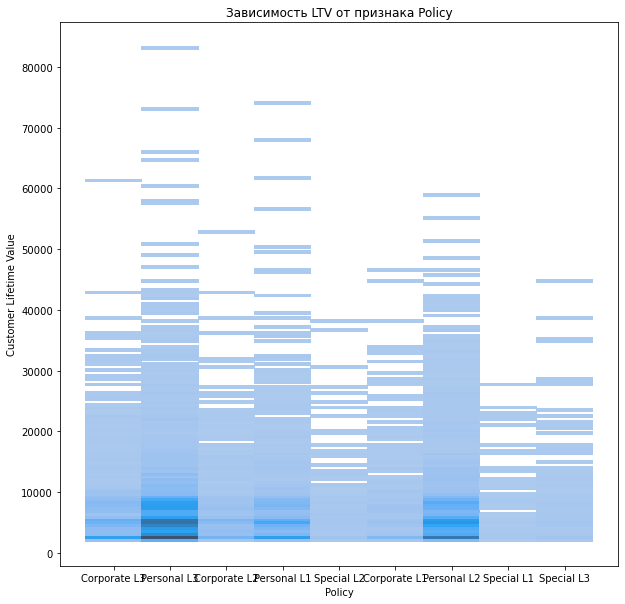

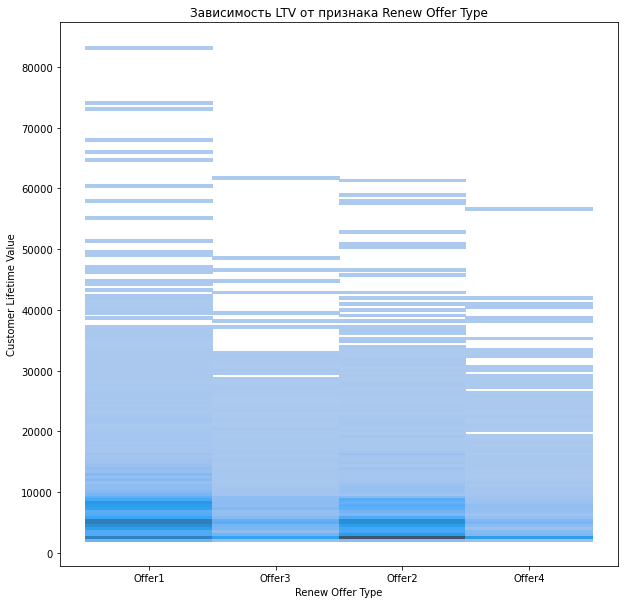

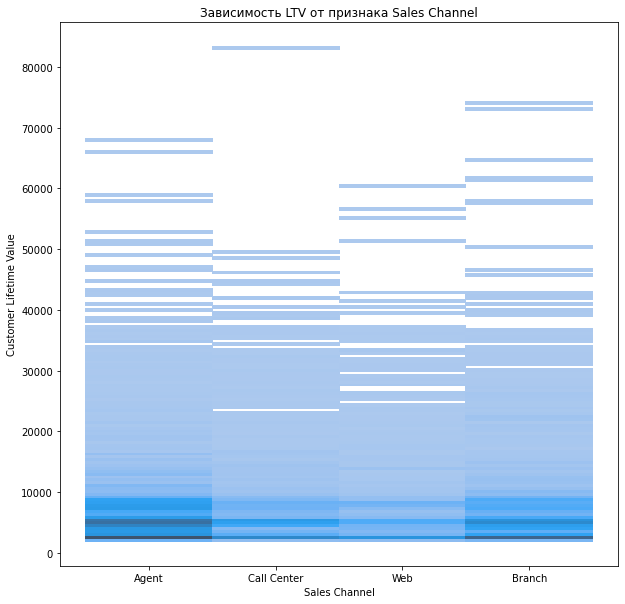

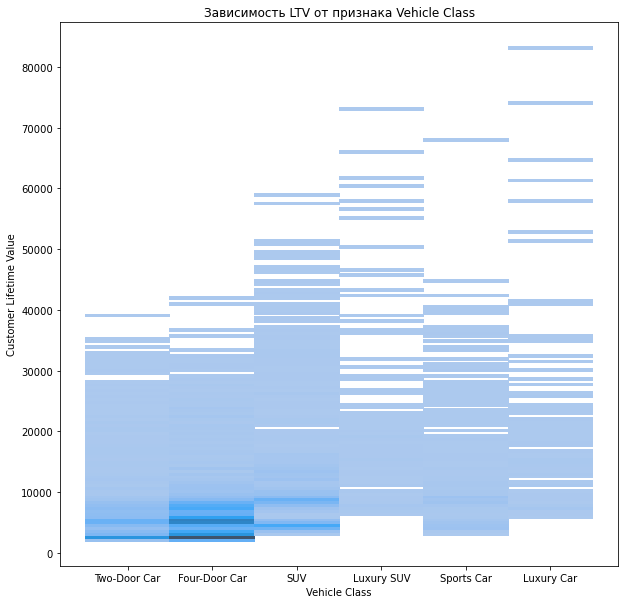

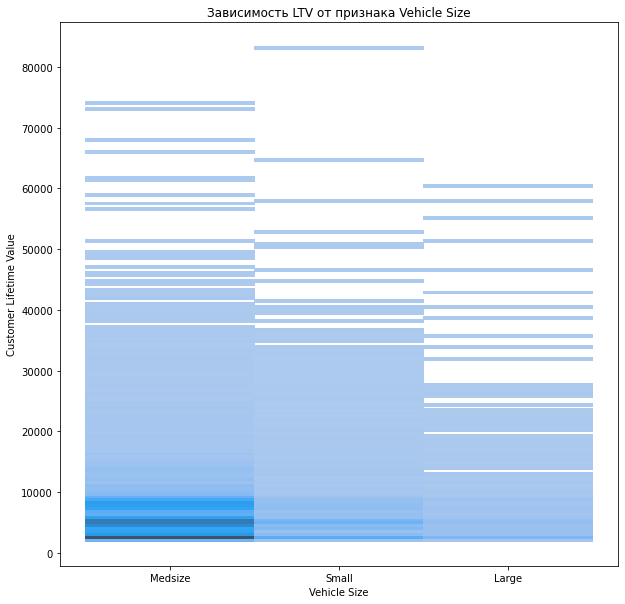

In [10]:
# Зависимость LTV от остальных признаков
for col in str_cols:
    plt.figure(figsize = (10, 10))
    plt.title(f'Зависимость LTV от признака {col}')
    sns.histplot(data, x = col, y = "Customer Lifetime Value")


## Выводы

Основные выводы после анализа данных таблицы:

**Number of Open Complaints**
Чем меньше открытых жалоб, тем выше LTV, то есть для удержания клиентов, как минимум, необходимо быстро рассматривать жалобы

**Number of Policies**
LTV выше у клиентов с 2 открытыми полисами и ниже с одним.

**Response**
Те, кто не взаимодействовал с рекламой имеют более высокий LTV

**EmploymentStatus**
Пенсионеры и инвалиды имеют самый низкий LTV, тогда как наивысший у работающего населения.

**Location Code**
В пригороде более высокий LTV, чем в городе или в сельской местности

**Marital Status**
Женатые/замужние имеют более высокий LTV чем холостяки или разведенные.

**Policy Type**
Персональные авто. Частники имеют более высокий LTV, чем корпоративные клиенты.

**Policy**
Спец авто имеют наименьший LTV

**Renew Offer Type**
Offer 1 и Offer 3 - эти предложения показывают более высокий LTV

**Vehicle Class**
Более дорогие машины приносят более высокий LTV

Общий портрет пользователя с более высоким LTV - это семья, живущая в пригороде с 2 ТС (2 открытых полиса более высокий LTV), работающие.

## Обучение различных моделей

Поскольку стоит задачи прогнозирования рассматриваю 3 модели: Линейная регрессия, регрессия на решающем дереве, Random forest regression.

In [5]:
# Линейная регрессия
X_train, X_test, y_train, y_test = train_test_split(X[num_cols], y, random_state = 42, test_size = .2)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

pred_lin_reg = lin_reg.predict(X_test)

mse = mean_squared_error(pred_lin_reg, y_test)
mae = mean_absolute_error(pred_lin_reg, y_test)

# Корень из среднеквадратичной ошибки
rmse = mse ** .5

print("Среднее значение целевой переменной:", y.mean())
print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)
cv = cross_validate(lin_reg, X[num_cols], y, cv = 5)

print(cv['test_score'])
print("Среднее отклонение:", cv['test_score'].mean())

Среднее значение целевой переменной: 8004.9404749870755
MSE: 43650050.64089421
MAE: 4010.5891050184864
RMSE: 6606.818496136715
[0.13396211 0.16617113 0.19223672 0.15779227 0.13084972]
Среднее отклонение: 0.15620238906191916


In [6]:
X_ENCODED = X.copy()
le = LabelEncoder()
for col in str_cols:
    X_ENCODED[col] = le.fit_transform(X_ENCODED[col])    

In [9]:
# Линейная регрессия
X_train, X_test, y_train, y_test = train_test_split(X_ENCODED, y, random_state = 42, test_size = .2)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

pred_lin_reg = lin_reg.predict(X_test)

mse = mean_squared_error(pred_lin_reg, y_test)
mae = mean_absolute_error(pred_lin_reg, y_test)

print("Среднее значение целевой переменной:", y.mean())
print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", mse ** .5)
cv = cross_validate(lin_reg, X_ENCODED, y, cv = 5)

print(cv['test_score'])
print("Среднее отклонение:", cv['test_score'].mean())

Среднее значение целевой переменной: 8004.9404749870755
MSE: 43513716.11674822
MAE: 3983.9229544388213
RMSE: 6596.492713309719
[0.13416007 0.16404778 0.19543355 0.16132902 0.13178583]
Среднее отклонение: 0.15735125061937758


In [10]:
# Решающее дерево

X_train, X_test, y_train, y_test = train_test_split(X_ENCODED, y, random_state = 42, test_size = .2)

model_tree = DecisionTreeRegressor()
model_tree.fit(X_train, y_train)
pred_tree = model_tree.predict(X_test)
mse = mean_squared_error(pred_tree, y_test)
mae = mean_absolute_error(pred_tree, y_test)

print("Среднее значение целевой переменной:", y.mean())
print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", mse ** .5)
cv = cross_validate(model_tree, X_ENCODED, y, cv = 5)

print(cv['test_score'])
print("Среднее отклонение:", cv['test_score'].mean())

Среднее значение целевой переменной: 8004.9404749870755
MSE: 27801810.26582327
MAE: 1754.8751072364532
RMSE: 5272.742196032656
[0.4331964  0.38722245 0.44544203 0.42988431 0.37239909]
Среднее отклонение: 0.41362885653377346


In [15]:
#Random Forest

X_train, X_test, y_train, y_test = train_test_split(X_ENCODED, y, random_state = 42, test_size = .2)

random_tree = RandomForestRegressor()
random_tree.fit(X_train, y_train)
pred_tree = random_tree.predict(X_test)
mse = mean_squared_error(pred_tree, y_test)
mae = mean_absolute_error(pred_tree, y_test)

print("Среднее значение целевой переменной:", y.mean())
print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", mse ** .5)
cv = cross_validate(random_tree, X_ENCODED, y, cv = 5)

print(cv['test_score'])
print("Среднее отклонение:", cv['test_score'].mean())

Среднее значение целевой переменной: 8004.9404749870755
MSE: 15839180.059425045
MAE: 1477.570607651955
RMSE: 3979.846738182897
[0.69774565 0.72397643 0.69266885 0.70370041 0.69579703]
Среднее отклонение: 0.7027776741135909


## Сравнение моделей

Отклонение прогнозируемых данных и реальных во всех 3-х моделях высокое, что говорит о том, что ни одна модель не работает. При оценке показателя test_score при кросс-валидации (который, кстати, я не понимаю, как правильно интерпретировать), выходит, что Случайные деревья работают хуже всего, хотя у этой модели самый низкий RMSE относительно среднего значения целевой переменной.
Кроме того, для линейной регрессии я сделала прогноз только на числовых данных num_cols и на всех, и метрики для оценки работы модели показали примерно одни и те же значения, что также не очень понятно.